# TESS Tutorial using Lightkurve 
I have borrowed a tutorial presented by Christina Hedges at the Tess Data workshop to put this together.  Lightkurve is apackage written by people in the Kepler/K2 mission office to work with time series data from Kepler, K2 and TESS.  It simplifies a lot of the steps if you like to program in a pythonic sort of way.

Target Pixel Files (TPFs) are a file common to Kepler/K2 and the TESS mission. They contain movies of the pixel data centered on a single target star.

In this tutorial we'll cover the basics of working with TPFs. In *lightkurve* there are classes to work with each mission. For example `KeplerTargetPixelFile` deals with data from the Kepler (and K2) mission. `TessTargetPixelFile` deals with data from the TESS mission. We'll use a Kepler TPF as an example.

To load a `KeplerTargetPixelFile` from a local path or remote url, simply create a new object using the location of the file as the parameter:

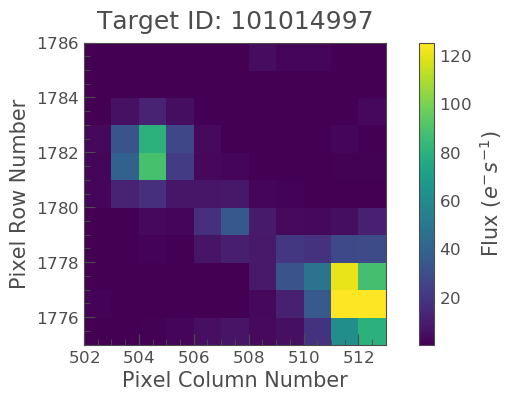

In [14]:
import lightkurve as lk
tpf = lk.search_targetpixelfile('BPM 31594', sector=3).download()
tpf.plot()

* Light Curve Files (LCFs): These files are created by the TESS pipeline. The pipeline processes the pixels into light curves, and stores them as a fits file. For TESS, Kepler and K2 there are two light curves in each light curve file; a Simple Aperture Photometry (SAP) light curve and a Pre Datasearch Conditioned (PDCSAP) light curve. The PDCSAP light curves have been processed to remove some instrumental artefacts.

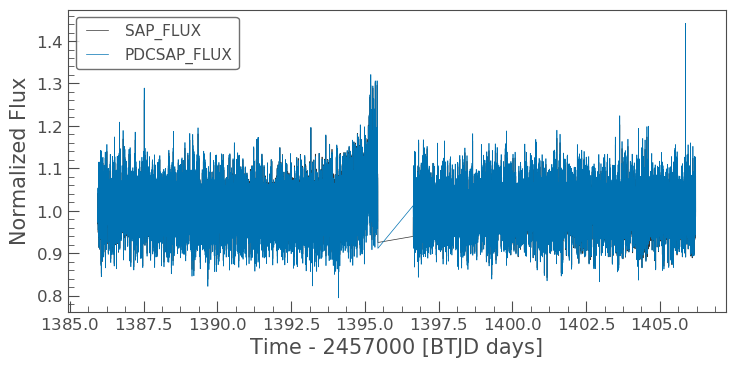

In [15]:
lcf = lk.search_lightcurvefile('BPM 31594',sector=3).download()
lcf.plot();

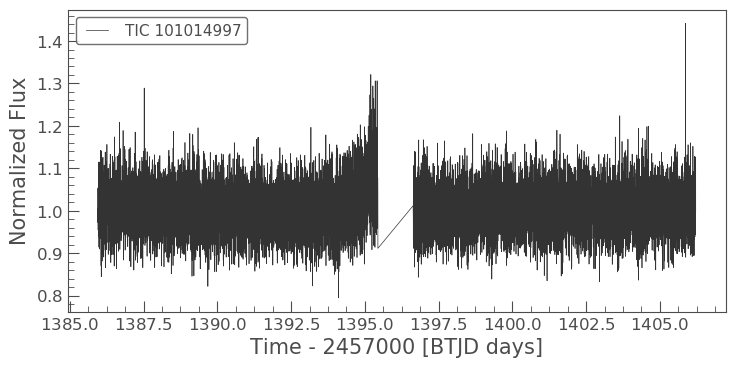

In [16]:
lc = lcf.PDCSAP_FLUX
lc.plot();

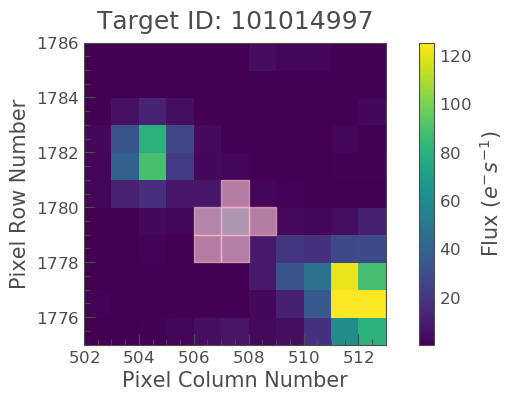

In [17]:
#Curious about the pipeline mask.
tpf.plot(aperture_mask=tpf.pipeline_mask)

## 4.2 Stringing Commands Together
Using light curve it is possible to string these commands together in a single "sentence". 

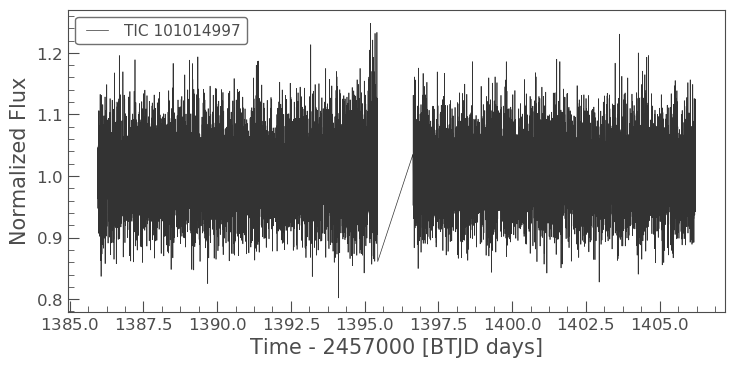

In [24]:
#This removes the nans, removes a median filter of windown length 401 and removes the outliers 
#Breaktolerance tells it how big the gap before splitting it into two.
lc = lcf.PDCSAP_FLUX.remove_nans().flatten(window_length=401, break_tolerance=50).remove_outliers()
lc.plot()

In [27]:
#Take a Periodogram
# Create periodogram object
p = lc.to_periodogram(method='LombScargle')

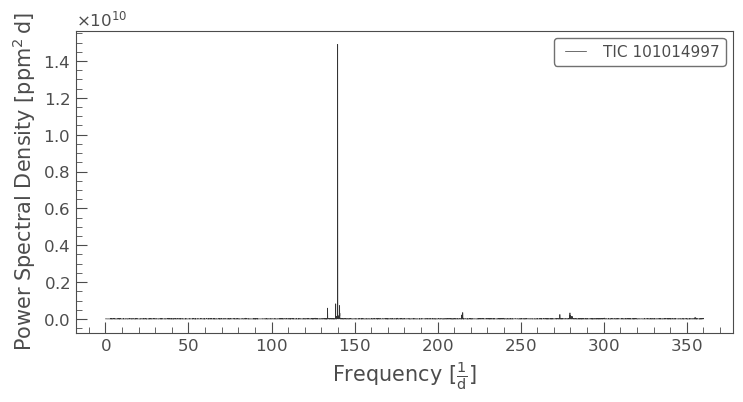

In [28]:
p.plot()

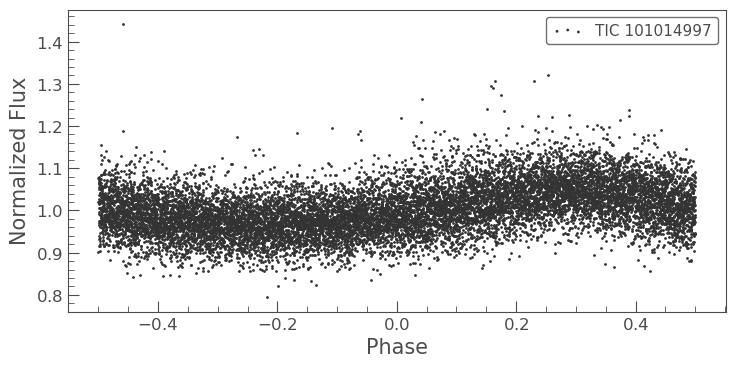

In [20]:
lc.fold(p.period_at_max_power.value).scatter();

In [29]:
#Tess cut with lightkurve
tpf = lk.search_tesscut('Pi Men').download(cutout_size=20)
tpf.plot()

AttributeError: module 'lightkurve' has no attribute 'search_tesscut'

## Problem
A well known TESS planet is WASP-18 b.  Use lightkurve to get the light curve data, take the periodogram and fold the data. You might consider doing a box-least-squares periodogram.

In [46]:
lcf = lk.search_lightcurvefile("WASP-18",sector=2).download()

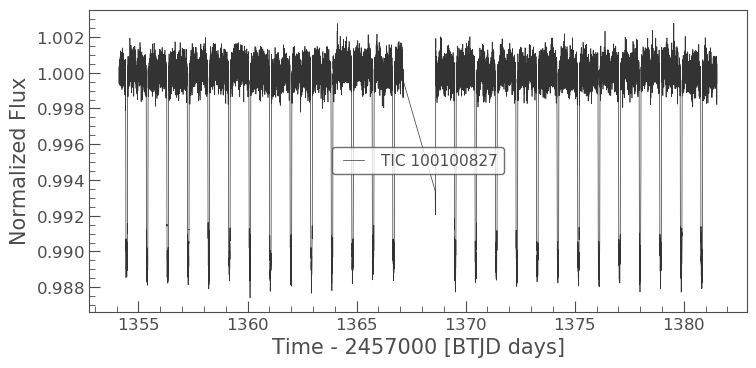

In [47]:
lc = lcf.PDCSAP_FLUX
lc.plot()

(0, 20)

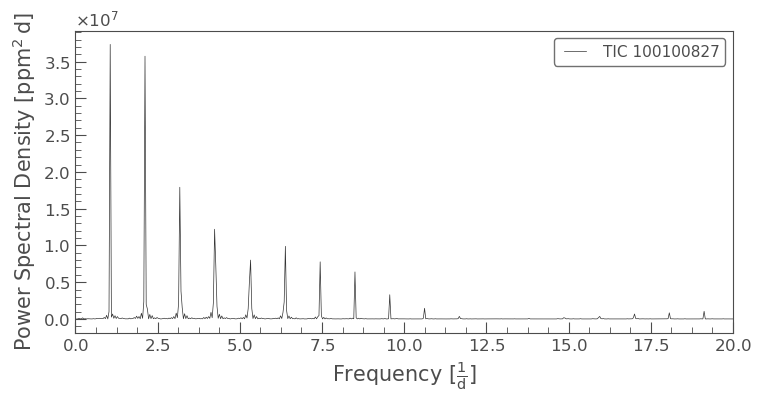

In [41]:
p = lc.remove_nans().to_periodogram(method='LombScargle')
p.plot()
import matplotlib.pyplot as plt
plt.xlim(0,20)

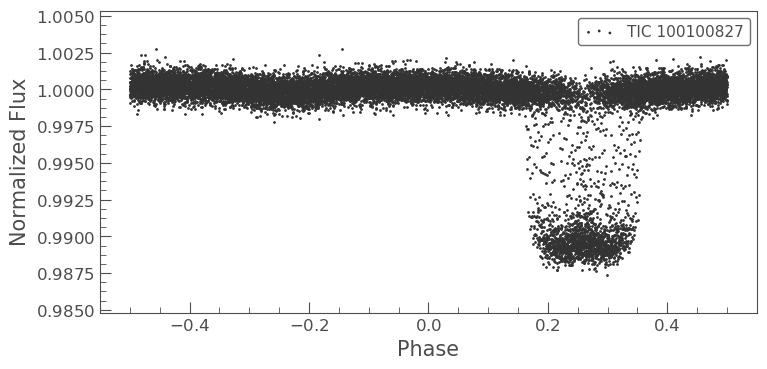

In [52]:
lc.fold(p.period_at_max_power.value).scatter()

(0.2, 2)

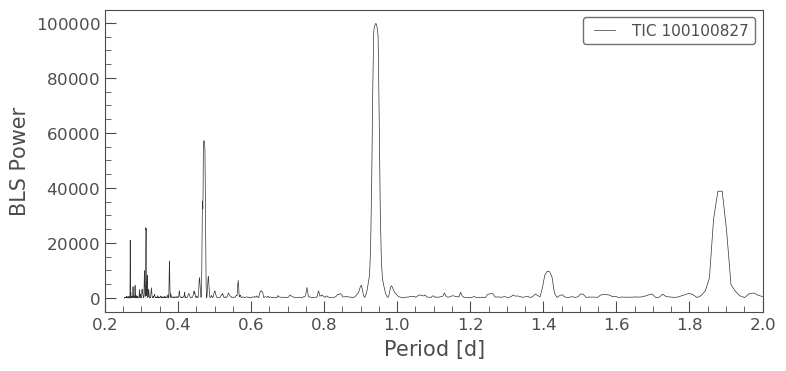

In [49]:
B = lc.remove_nans().to_periodogram(method='BLS')
B.plot()
import matplotlib.pyplot as plt
plt.xlim(0.2,2)

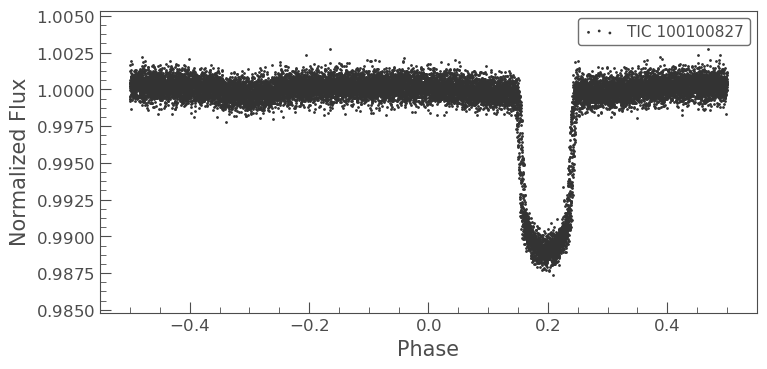

In [51]:
lc.fold(B.period_at_max_power.value).scatter()